In [ ]:
# Patient Health Record Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better visuals
sns.set(style='whitegrid')


In [2]:
df=pd.read_csv("healthcare_dataset.csv")

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,10/9/2022,Penicillin,Abnormal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
# Convert dates
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [6]:
# Calculate length of stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [7]:
# Convert Billing Amount to numeric (remove symbols if any)
df['Billing Amount'] = df['Billing Amount'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\admin\AppData\Local\Temp\ipykernel_15984\713084531.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Billing Amount'] = df['Billing Amount'].replace('[\$,]', '', regex=True).astype(float)


In [8]:

# Handle missing data
df['Test Results'].fillna('Pending', inplace=True)
df.dropna(subset=['Medical Condition'], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15984\2701018314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Test Results'].fillna('Pending', inplace=True)


Text(0.5, 1.0, 'Age Distribution')

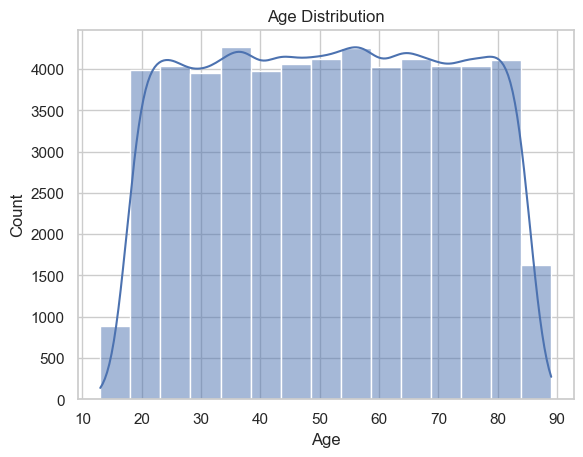

In [9]:
# Age distribution
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Gender Distribution')

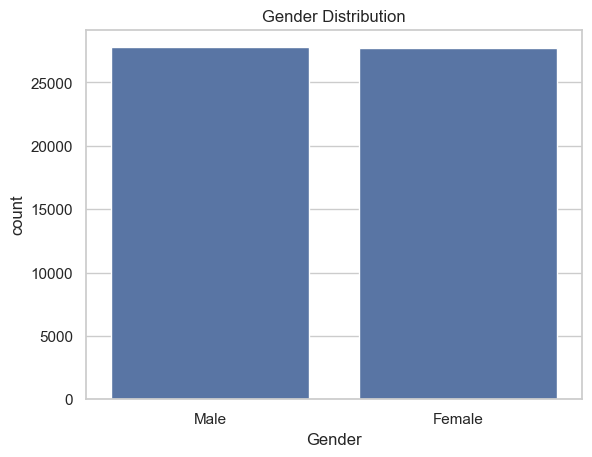

In [10]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Blood Type Distribution')

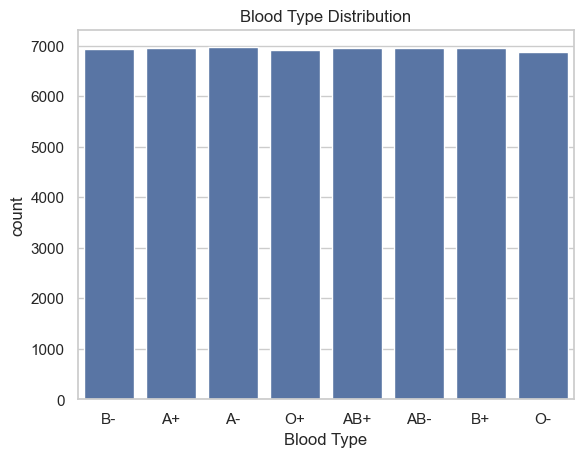

In [11]:
# Blood type distribution
sns.countplot(x='Blood Type', data=df)
plt.title("Blood Type Distribution")

Text(0.5, 0, 'Count')

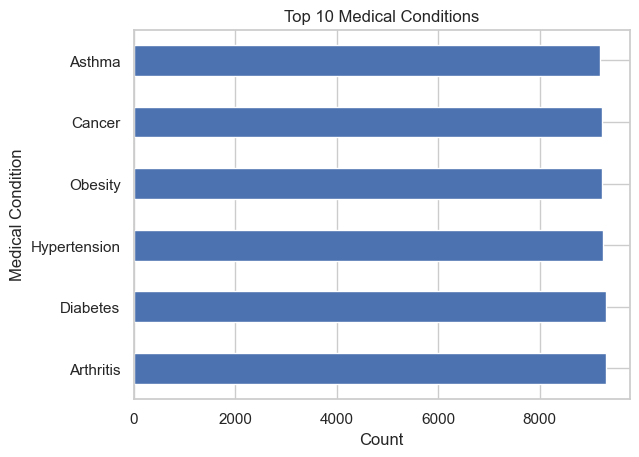

In [12]:
# Top medical conditions
df['Medical Condition'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Medical Conditions")
plt.xlabel("Count")


Text(0.5, 1.0, 'Avg Length of Stay by Medical Condition')

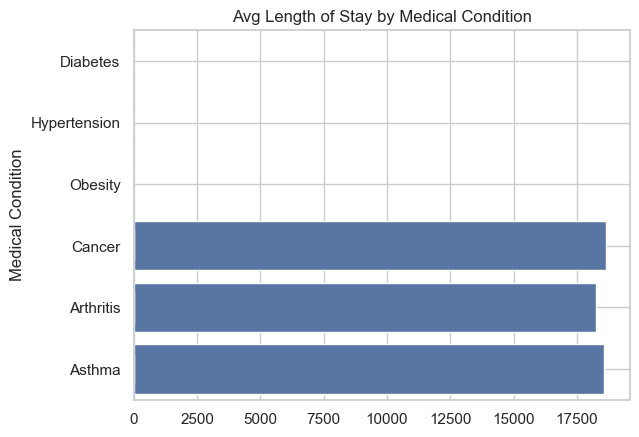

In [13]:
# Admission types
sns.countplot(y='Admission Type', data=df)
plt.title("Admission Type Distribution")

# Length of stay by condition
df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Avg Length of Stay by Medical Condition")


In [ ]:
# Patients handled by doctors
df['Doctor'].value_counts().head(10).plot(kind='bar')
plt.title("Top Doctors by Number of Patients")

# Billing amount by hospital
df.groupby('Hospital')['Billing Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total Billing by Hospital")




Text(0.5, 1.0, 'Total Billing by Hospital')

In [ ]:
# Avg billing by insurance provider
df.groupby('Insurance Provider')['Billing Amount'].mean().sort_values().plot(kind='barh', color='orange')
plt.title("Average Billing by Insurance Provider")


In [ ]:
# Top medications
df['Medication'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Prescribed Medications")

# Test result summary
sns.countplot(y='Test Results', data=df)
plt.title("Test Results Distribution")


In [ ]:
df.to_csv("cleaned_hospital_data.csv", index=False)
